In [ ]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A

In [2]:
def show(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

In [3]:
# Let's load an image
image = cv2.imread('./images/parrot.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image)

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### You can use `ReplayCompose` class to debug your augmentation pipeline. Let's apply something to our image

In [4]:
transform = A.ReplayCompose([
    A.Resize(512, 512, always_apply=True),
    A.RandomCrop(200, 200, always_apply=True),
    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])

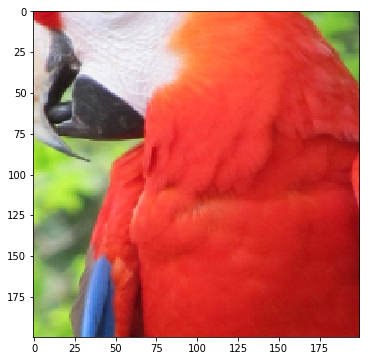

In [13]:
data = transform(image=image)
show(data['image'])

### Some augmentations have randomness inside and imagine that we want to track which random parameters was applied to image. Keys `'replay'` and `'params'` to rescue

In [7]:
data['replay']

{'__class_fullname__': 'albumentations.core.composition.ReplayCompose',
 'params': None,
 'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.Resize',
   'always_apply': True,
   'p': 1,
   'height': 512,
   'width': 512,
   'interpolation': 1,
   'params': {},
   'applied': True},
  {'__class_fullname__': 'albumentations.augmentations.transforms.RandomCrop',
   'always_apply': True,
   'p': 1.0,
   'height': 200,
   'width': 200,
   'params': {'h_start': 0.1528928035562429, 'w_start': 0.44628106788089794},
   'applied': True},
  {'__class_fullname__': 'albumentations.core.composition.OneOf',
   'params': None,
   'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.RGBShift',
     'always_apply': False,
     'p': 0.5,
     'r_shift_limit': (-20, 20),
     'g_shift_limit': (-20, 20),
     'b_shift_limit': (-20, 20),
     'params': None,
     'applied': False},
    {'__class_fullname__': 'albumentations.augmentations.transforms.HueSat

### And you can apply exact same augmentations to other images to see these augmentations work on other images

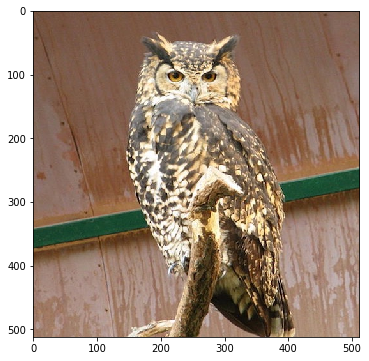

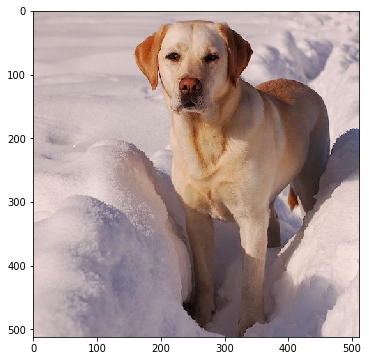

In [8]:
image2 = cv2.imread('./images/image_2.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
show(image2)
image3 = cv2.imread('./images/image_3.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
show(image3)

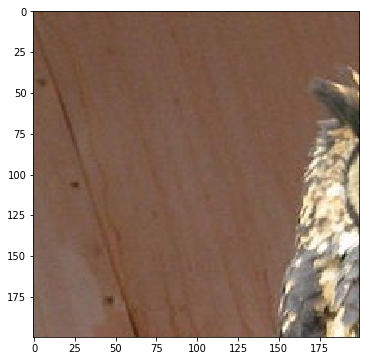

In [9]:
image2_transformed = A.ReplayCompose.replay(data['replay'], image=image2)['image']
show(image2_transformed)

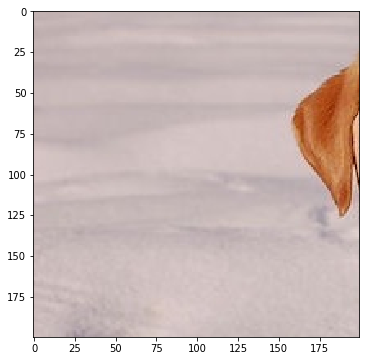

In [10]:
image3_transformed = A.ReplayCompose.replay(data['replay'], image=image3)['image']
show(image3_transformed)